In [271]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

In [272]:
from datetime import datetime

In [273]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import seaborn as sns
import json
import requests
import folium
from folium.plugins import TimeSliderChoropleth

In [274]:
url = 'https://www.ncsl.org/research/labor-and-employment/state-unemployment-update.aspx'

In [275]:
df = pd.read_html(url)[0]
type(df)
df.head()

,State,Jan.,Feb.,March,April,May,June,July,Aug.,Sept.,Oct.,Nov.,Dec.
0,Alabama,4.3,4.0,3.8,3.6,3.4,3.3,3.2,3.1,3.1,3.1,3.1,3.1
1,Alaska,6.6,6.6,6.6,6.7,6.6,6.6,6.6,6.4,6.3,6.1,6.0,5.7
2,Arizona,6.7,6.9,6.7,6.7,6.7,6.8,6.6,6.2,5.7,5.2,4.7,4.1
3,Arkansas,4.6,4.5,4.4,4.4,4.4,4.4,4.3,4.2,4.0,3.7,3.4,3.1
4,California,9.0,8.5,8.3,8.3,7.9,7.7,7.6,7.5,7.5,7.3,6.9,6.5


In [276]:
sorted = list(pd.DataFrame(
    df.set_index('State').transpose()\
    .mean().sort_values(ascending=False)).index
             )


In [277]:
x = df.set_index('State').transpose().index
x

Index(['Jan.', 'Feb.', 'March', 'April', 'May', 'June', 'July', 'Aug.',
       'Sept.', 'Oct.', 'Nov.', 'Dec.'],
      dtype='object')

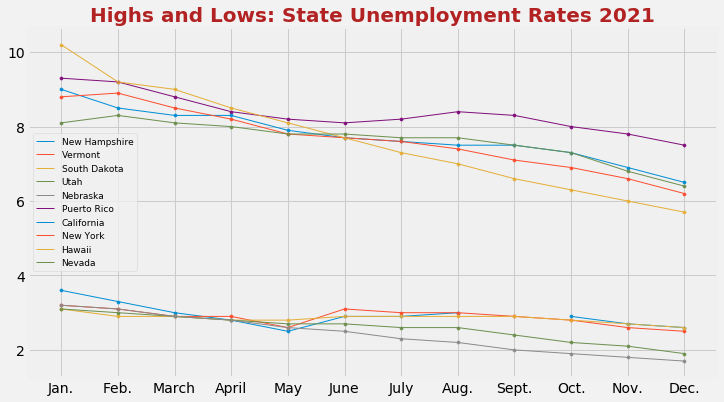

In [278]:
plt.figure(figsize=(11, 6), facecolor='0.95', )
plt.title('Highs and Lows: State Unemployment Rates 2021', fontsize=20, color='firebrick', weight='semibold')
states = df.set_index('State').transpose().columns
highest = sorted[ :5 ]
lowest = sorted[ -5: ]
merged = [ *lowest, *highest ]
for s in merged: #state
    pass
    y = df.set_index('State').transpose()[s]
    len(y)
    plt.scatter( x, y, s=10 )
    plt.plot( x, y, linewidth=1 )
plt.legend( merged, fontsize=9 )
plt.show()    

In [279]:
urljson = 'https://raw.githubusercontent.com/shawnbot/topogram/master/data/us-states.geojson'

In [280]:
geo = json.loads(requests.get(urljson).text)

In [281]:
m = folium.Map(location=[35, -95], zoom_start=4)
m.choropleth(
    geo_data = geo,                  #json
    data =  df,                     
    columns = ['State', 'April'], #columns to work on
    key_on ='feature.properties.name',
    fill_color ='YlGnBu',     
    line_color ='white',     
    fill_opacity = 0.7,
    line_opacity = 0.8,
   legend_name = "Scale Test"
)
# m

C:\Users\DENVER\anaconda3\lib\site-packages\folium\folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [282]:
df = pd.read_html(url)[0]

In [283]:
datetime_index = pd.date_range('2021-1-1', periods=12, freq='M')
dt_index_epochs = datetime_index.astype(int) 
dt_index = dt_index_epochs.astype('U10')

In [284]:
l = []
for i,state in enumerate(df['State']):
    pass
    d={}
    for j, month in enumerate( df.columns[1:] ):
        pass
        d= {
        'State' : state,
        'Month' : month.replace('.', ''),
        'Date'  : dt_index[ j ],  
        'Rate' :  list(df.loc[ df['State'] == state ][month])[0],
        }
        l.append(d)
        
dfm = pd.DataFrame(l)    
dfm.head()

,State,Month,Date,Rate
0,Alabama,Jan,1612051200,4.3
1,Alabama,Feb,1614470400,4.0
2,Alabama,March,1617148800,3.8
3,Alabama,April,1619740800,3.6
4,Alabama,May,1622419200,3.4


https://notebook.community/ocefpaf/folium/examples/TimeSliderChoropleth

In [285]:
dfm = dfm.set_index( 'Date' ) if 'Date' in dfm.columns else dfm
dfm.head()

,State,Month,Rate
Date,,,
1612051200,Alabama,Jan,4.3
1614470400,Alabama,Feb,4.0
1617148800,Alabama,March,3.8
1619740800,Alabama,April,3.6
1622419200,Alabama,May,3.4


### add geojson polygons

In [286]:
gdict = {}
for i in range(len(geo['features'])):
    pass
    gdict[geo[ 'features' ][i]['properties']['name']] = geo[ 'features' ][i][ 'geometry' ]
# gdict    

In [287]:
# .astype(int).astype('U10')
dfm['geometry'] = ['' for i in range(len(dfm))]
dg = dfm.to_dict()
# dg

In [288]:
g_list = []
for s,g in zip( dfm['State'], dfm['geometry']):
    pass
    g_list.append( gdict.get(s, '') )
dg[ 'geometry' ] = g_list
# dg

In [293]:
m = folium.Map(
    [0, 0],
    tiles='Stamen Terrain',
    zoom_start=2
)

g = TimeSliderChoropleth(
    data=df.to_json() ,
    styledict={},
).add_to(m)
m